In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.isnull().sum()  

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
dfy=df['median_house_value'] 
dfx=df.drop(columns=['median_house_value'])

In [10]:
x_train , x_test , y_train , y_test = train_test_split(dfx,dfy,test_size=0.2,random_state=0)

In [11]:
data_train = pd.concat([x_train,y_train],axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

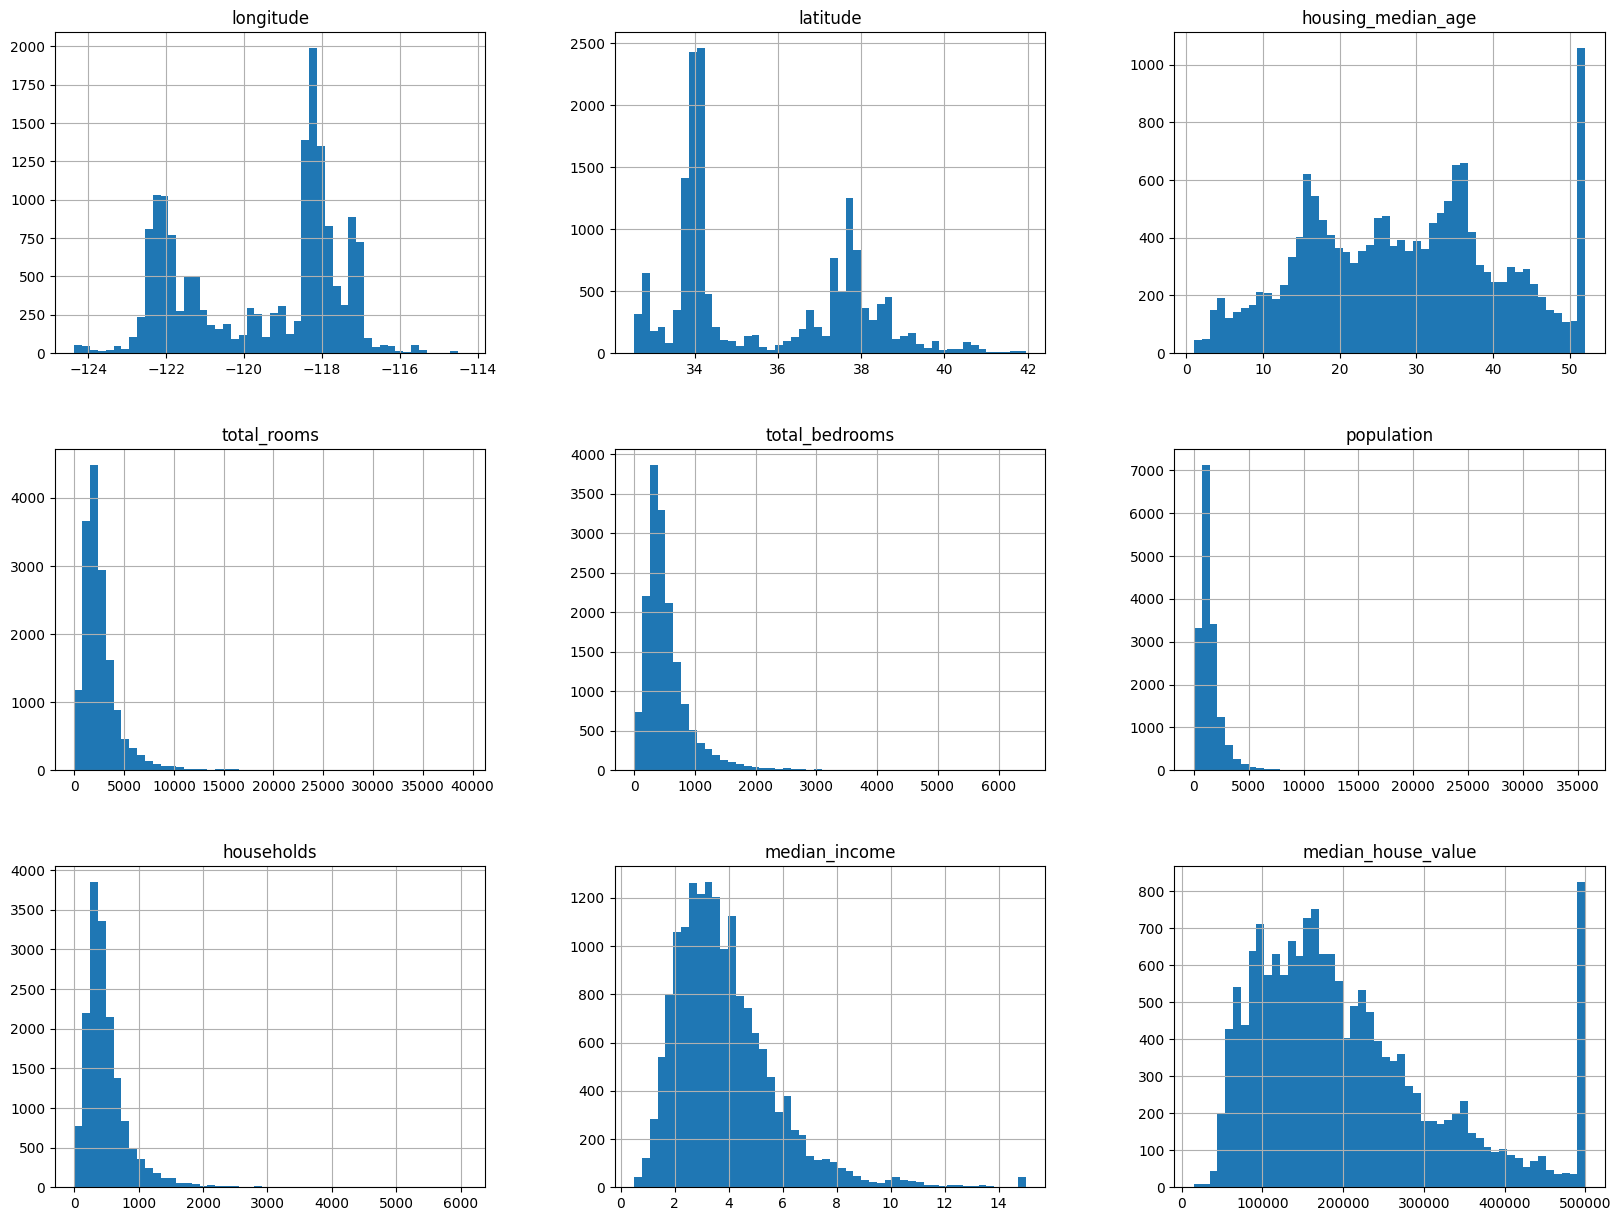

In [12]:
data_train.hist(bins=50,figsize=(20,15))

In [13]:
data_train = data_train.join(pd.get_dummies(data_train.ocean_proximity)).drop(['ocean_proximity'], axis=1)


In [14]:
df['bedrooms_ratio'] = df['total_bedrooms']/df['total_rooms']
df['population_ratio'] = df['population']/df['households']
df['households_ratio'] = df['households']/df['total_rooms']

In [15]:
df['total_bedrooms'] = np.log(df['total_bedrooms'])
df['total_rooms'] = np.log(df['total_rooms'])
df['population'] = np.log(df['population'])
df['households'] = np.log(df['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

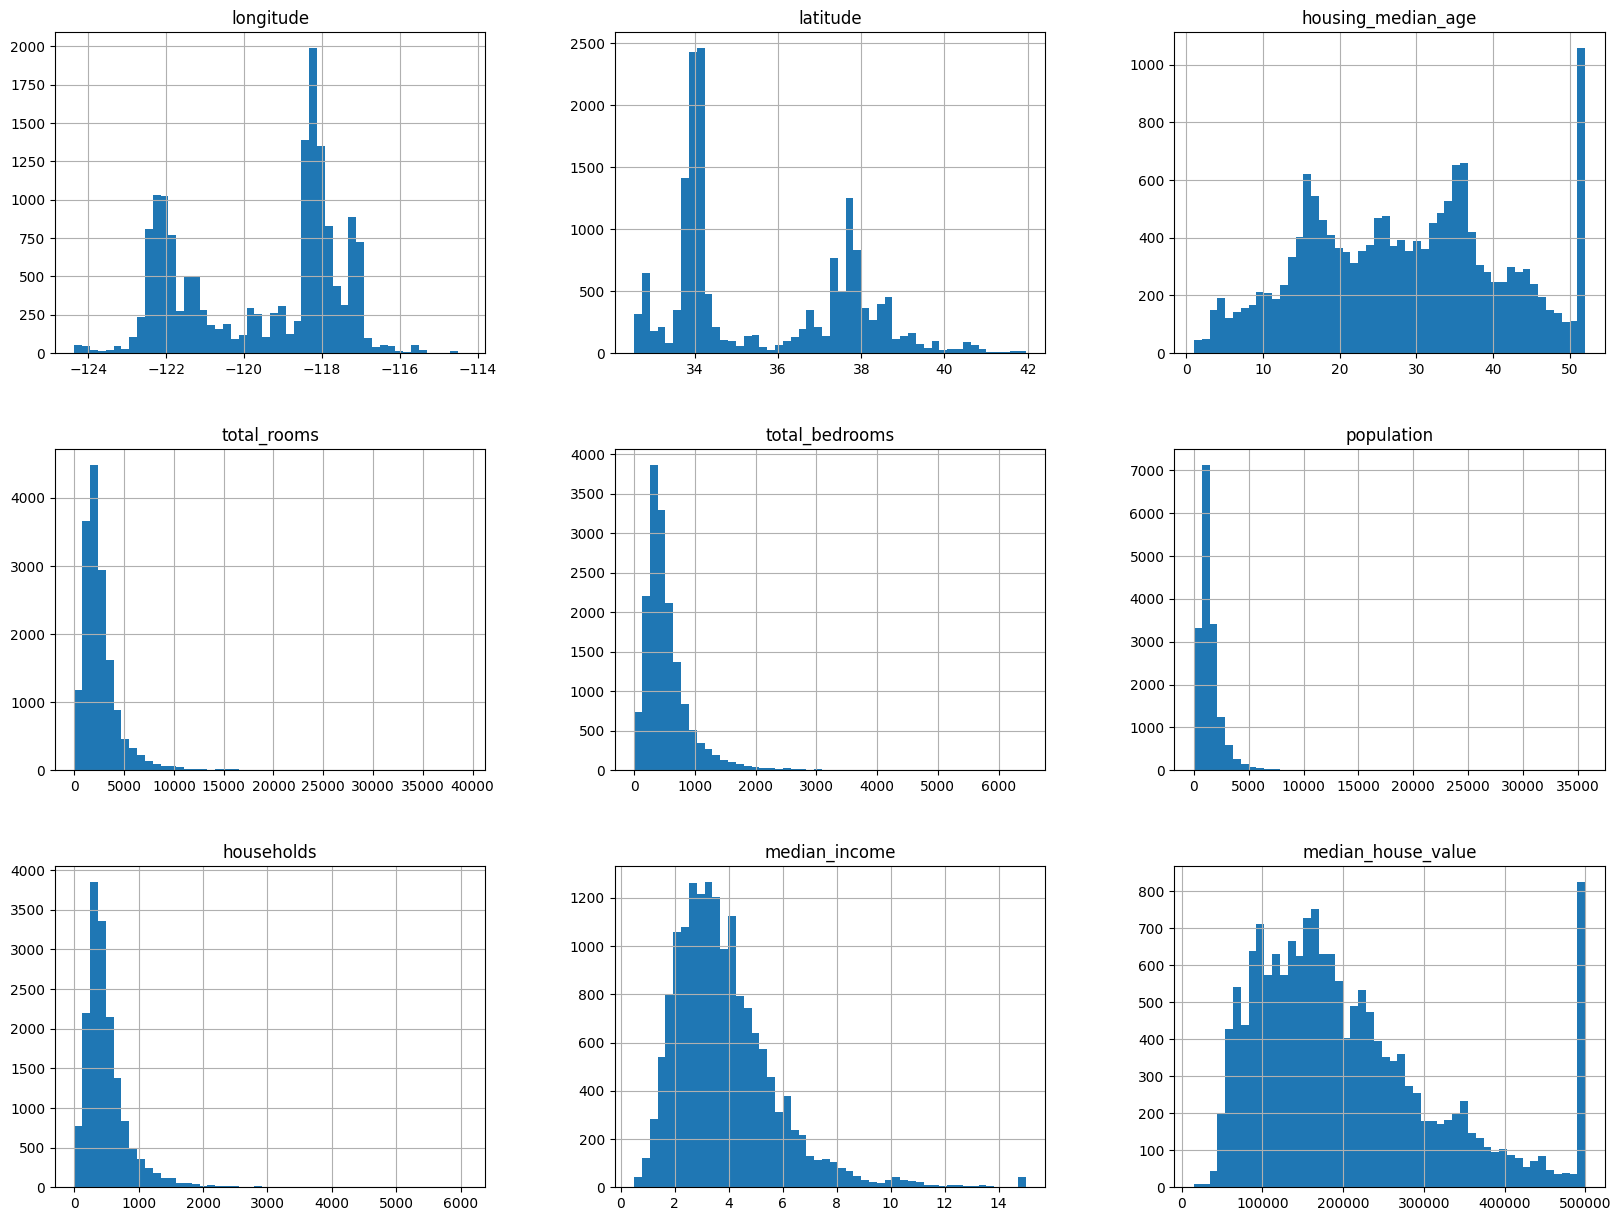

In [16]:
data_train.hist(bins=50,figsize=(20,15))

In [17]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,True,False,False,False,False
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,70500.0,False,True,False,False,False
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,117800.0,False,True,False,False,False
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,185400.0,False,True,False,False,False
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,94200.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,226800.0,False,True,False,False,False
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,52500.0,False,True,False,False,False
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,130400.0,False,False,False,True,False
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,165300.0,True,False,False,False,False


<Axes: >

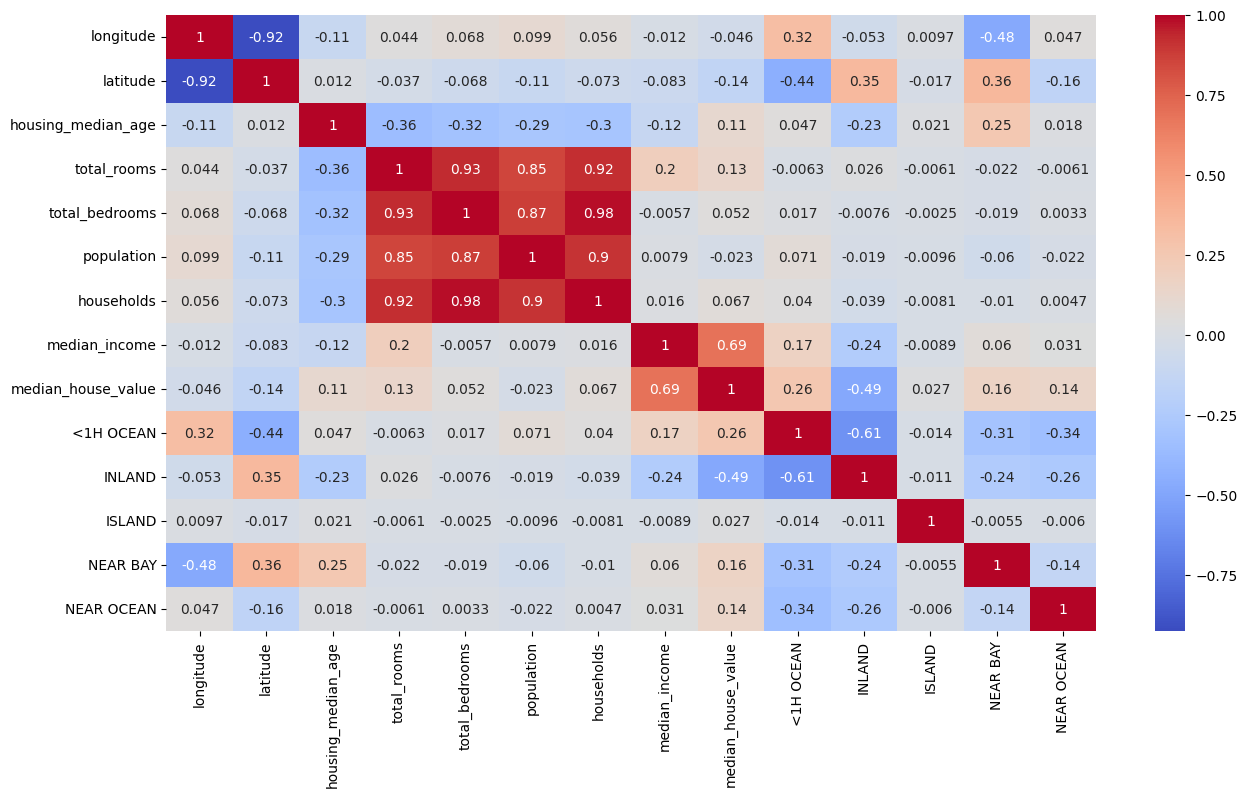

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(data_train.corr(), annot=True , cmap='coolwarm')

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
dfy=data_train['median_house_value'] 
dfx=data_train.drop(columns=['median_house_value'])

In [22]:
x_train , x_test , y_train , y_test = train_test_split(dfx,dfy,test_size=0.2,random_state=0)

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.score(x_test,y_test)

0.6513154700269805

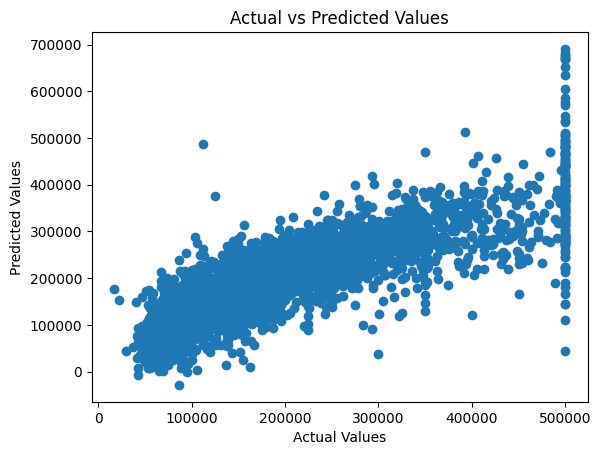

In [25]:

y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 49705.23173253639
Mean Squared Error: 4664159035.801816
Root Mean Squared Error: 68294.64866152997


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
modelR = RandomForestRegressor()

In [29]:
modelR.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [30]:
modelR.score(x_test_scaled, y_test)

0.8117596791299745

In [31]:
modelR.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
modelR.score(x_test, y_test)

0.8090788342705308

In [33]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = ({'n_estimators': [300, 400 ,500], 'random_state': [10, 50, 100]})

In [46]:
def evaluate_model(X_train, y_train):
    scores = GridSearchCV(modelR,param_grid, cv=3,verbose=1, scoring='neg_mean_squared_error')
    scores.fit(X_train, y_train)
    return scores.best_estimator_

In [47]:
best_model = evaluate_model(x_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [48]:
print(f'Best Model: {best_model}')

Best Model: RandomForestRegressor(n_estimators=400, random_state=50)


In [49]:
nmodel = RandomForestRegressor(n_estimators=400, random_state=50)

In [51]:
nmodel.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=400, random_state=50)

In [54]:
accuracy = nmodel.score(x_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8113115351794473


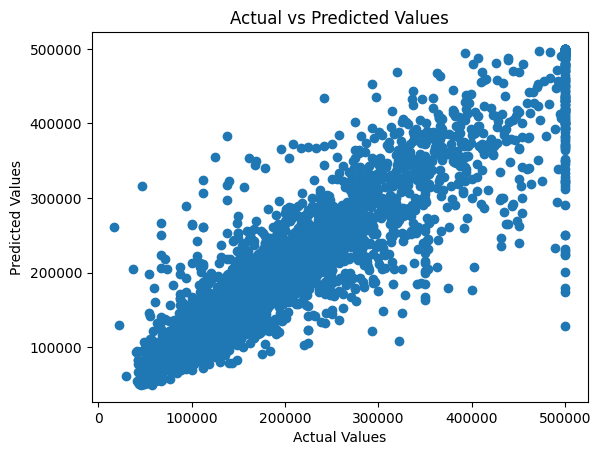

In [55]:

y_pred = nmodel.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()